In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#setting working directory
import os
os.getcwd()
os.chdir('/Users/akailwoo/Desktop/Ounass/DS/20190706_DS_ppt/data')

In [4]:
df = pd.read_csv('Social_Network_Ads.csv')


In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
x = df.iloc[:, 2:4]
y = df.iloc[:,-1]

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [8]:
#feature scaling
# options available: Normalizer()  MinMaxScaler()  RobustScaler()  StandardScaler()
#from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

sc_x = preprocessing.StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

/Users/akailwoo/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/akailwoo/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/akailwoo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [16]:
# decision trees
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0,  max_depth=5 )
classifier.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [10]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree.tree:

class DecisionTreeClassifier(BaseDecisionTree, sklearn.base.ClassifierMixin)
 |  DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : string, optional (default="best")
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.

In [17]:
classifier.score(x_test, y_test)

0.95

In [12]:
y_pred = classifier.predict(x_test)

In [13]:
#making the confusion matrix
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y_test, y_pred)
print(cm)

[[62  6]
 [ 4 28]]


In [ ]:
classifier.feature_importances_

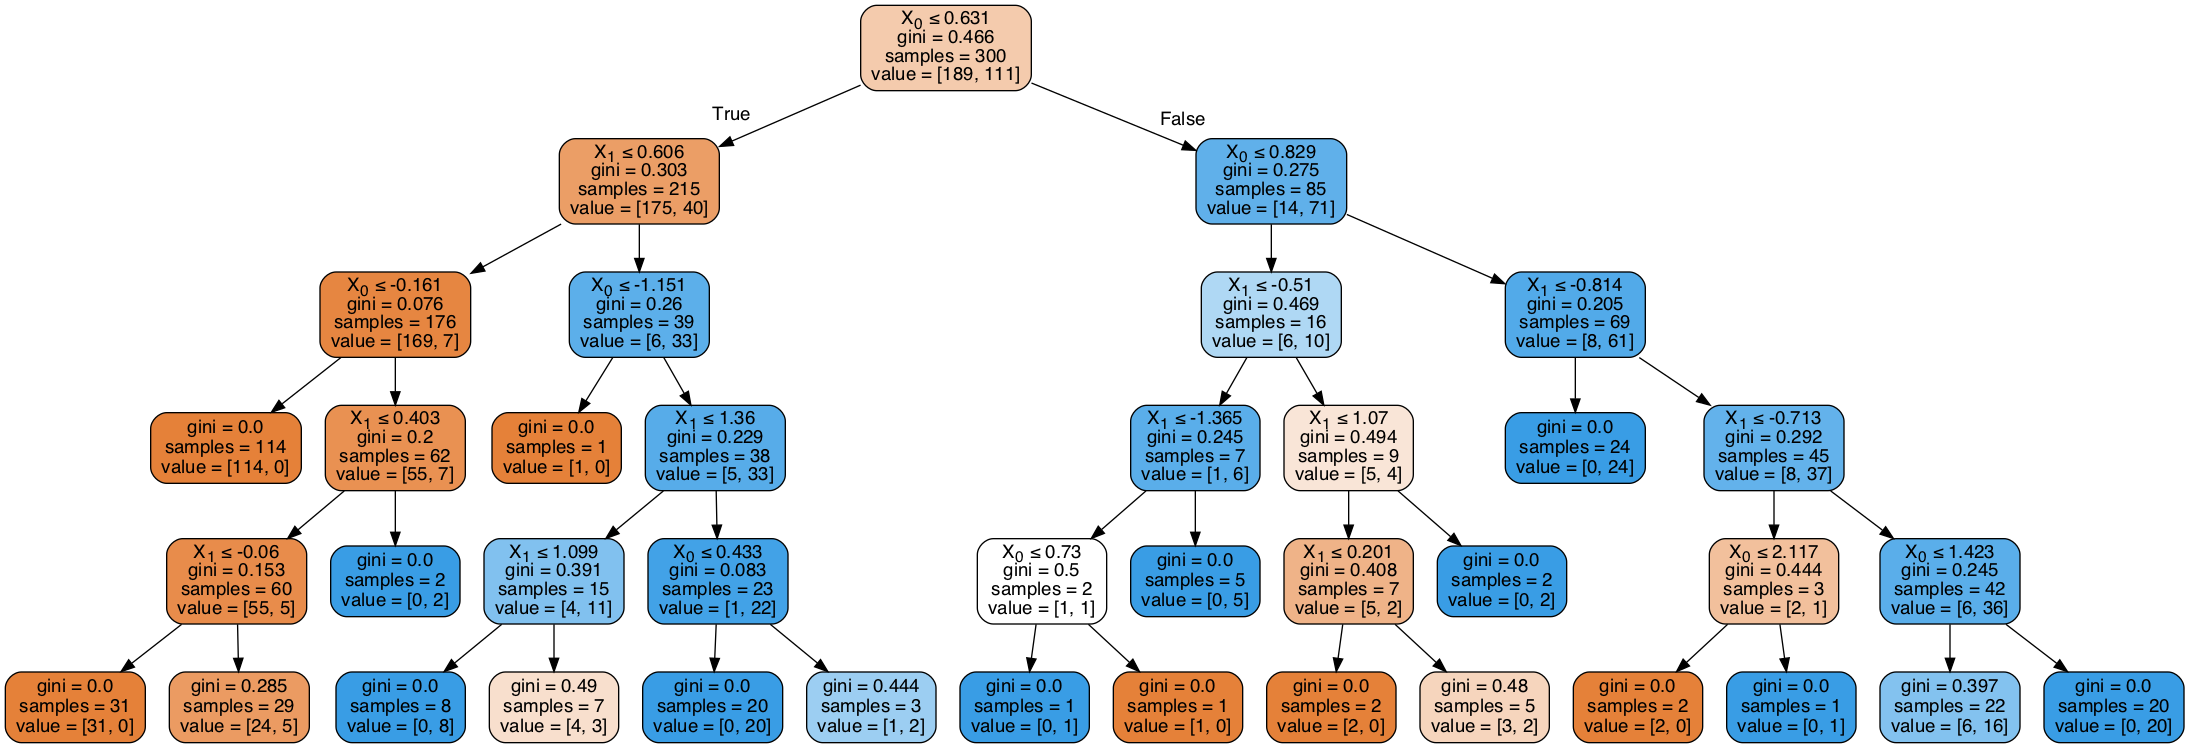

In [18]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


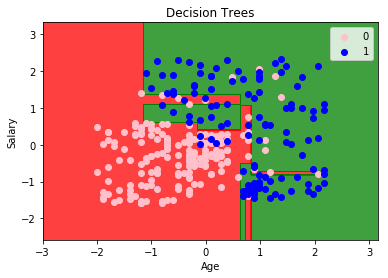

In [19]:
#visualizing results
from matplotlib.colors import ListedColormap

x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:,0].min() -1, stop = x_set[:,0].max() +1 , step = 0.01),
                     np.arange(start = x_set[:,1].min() -1, stop = x_set[:,1].max() +1 , step = 0.01))

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],
               c = ListedColormap(('pink', 'blue'))(i), label = j)
#     print(i)
#     print(j)
plt.title('Decision Trees')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()